* Radif Ramadan

* Data Science / JCSDOL-014

* Modul 3 - Day 41

---
---

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
df = pd.read_csv('Admission_Predict.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Features: `'GRE Score'`, `'TOEFL Score'`, `'University Rating'`, `'SOP'`, `'LOR'`, `'CGPA'`**

**Target: `'Chance of Admit'`**

In [26]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']]
y = df['Chance of Admit ']

### **Lakukan data splitting dengan proporsi 80:20 dan random_state = 42.**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

Gunakan model Ridge Regression dan Lasso Regression dengan berbagai nilai alpha (100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001). 

In [28]:
# List nilai alpha
alphas = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
ridge_mse, lasso_mse = [], []

for alpha in alphas:
    # Ridge Regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_y_pred_test = ridge.predict(X_test)
    ridge_mse.append(mean_squared_error(y_test, ridge_y_pred_test).round(3))
    
    # Lasso Regression
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_y_pred_test = lasso.predict(X_test)
    lasso_mse.append(mean_squared_error(y_test, lasso_y_pred_test).round(3))

Berapa nilai alpha terbaik untuk tiap model? 

In [29]:
# Mencari alpha terbaik
best_alpha_ridge = alphas[np.argmin(ridge_mse)]
best_alpha_lasso = alphas[np.argmin(lasso_mse)]

print(f"Alpha terbaik untuk Ridge Regression: {best_alpha_ridge}")
print(f"Alpha terbaik untuk Lasso Regression: {best_alpha_lasso}")

Alpha terbaik untuk Ridge Regression: 10
Alpha terbaik untuk Lasso Regression: 0.001


Bandingkan performa kedua model ditinjau dari nilai MSE-nya, manakah yang lebih 
baik? 

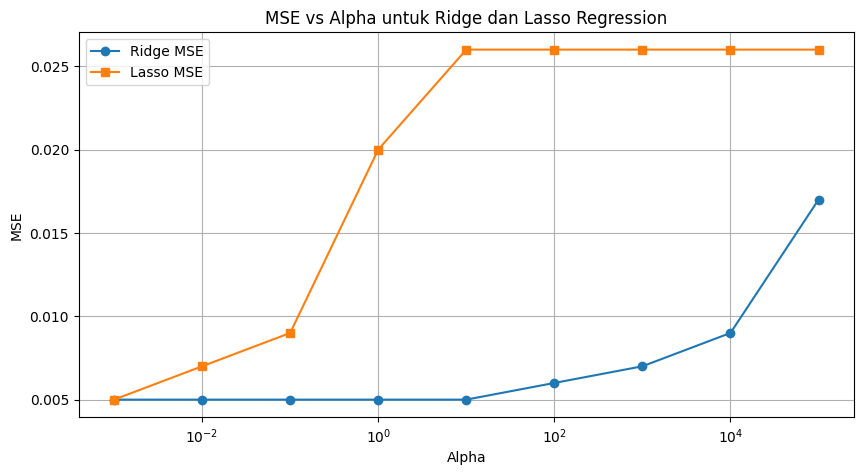

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(alphas, ridge_mse, marker='o', linestyle='-', label='Ridge MSE')
plt.plot(alphas, lasso_mse, marker='s', linestyle='-', label='Lasso MSE')
plt.xscale('log') 
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs Alpha untuk Ridge dan Lasso Regression')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Ridge Regression dengan alpha = 10
ridge_alpha = 10
ridge = Ridge(alpha=ridge_alpha)
ridge.fit(X_train, y_train)
ridge_y_pred_test = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred_test).round(3)

# Lasso Regression dengan alpha = 0.001
lasso_alpha = 0.001
lasso = Lasso(alpha=lasso_alpha)
lasso.fit(X_train, y_train)
lasso_y_pred_test = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred_test).round(3)

df_results = pd.DataFrame({
    "Model": ["Ridge Regression", "Lasso Regression"],
    "Alpha": [ridge_alpha, lasso_alpha],
    "MSE": [ridge_mse, lasso_mse]
})

best_model_row = df_results.loc[df_results["MSE"].idxmin()]

display(df_results)
print("\n**Model Terbaik:**")
display(best_model_row)


,Model,Alpha,MSE
0,Ridge Regression,10.000,0.005
1,Lasso Regression,0.001,0.005



**Model Terbaik:**


Model    Ridge Regression
Alpha                10.0
MSE                 0.005
Name: 0, dtype: object

#### 📌 **Kedua model miliki nilai MSE kecil yang sama pada nilai Alpha yang optimal, yang berarti kedua nya adalah model terbaik**